<a href="https://colab.research.google.com/github/Aseem2004/NLP/blob/main/03-Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Extraction

Feature extraction is the process of transforming raw text data into numerical representations that can be used as input for machine learning models. Computers don't understand text directly, so we need to convert it into a format they can work with. This is where feature extraction comes in.<br>
It is a very important step as good features will mean ultimately good results from the model and vice versa.

## Terminology
- Corpus (C): The entire collection of text data you are working with.
- Document (D): A single text unit within the corpus.
- Vocabulary (V): The set of all unique words (tokens) that appear across the whole corpus.
- Word/Token (W): The smallest individual unit of text after tokenization.

*   **Sentence Embeddings:** Similar to word embeddings, but they represent entire sentences as vectors. This allows for capturing the meaning of a sentence as a whole.
*   **Document Embeddings:** These techniques represent entire documents as vectors, capturing the overall topic or theme of the document.

The choice of feature extraction technique depends on the specific NLP task and the characteristics of the dataset.

## One Hot Encoding (OHE)

One Hot Encoding (OHE) is a method of converting categorical data into a numerical format that can be used by machine learning algorithms. In the context of NLP, OHE represents each word in a vocabulary as a binary vector where the position of the word in the vector is marked with a '1' and all other positions are '0'.
- **It converts each word into V-dimensional vector**


Let there be 4 documents as: <br>
D1 = people watch campusx <br>
D2 = campusx watch campusx <br>
D3 = people write comment <br>
D4 = campusx write comment <br>
<br>

**Corpus**: people watch campusx campusx watch campusx people write comment campusx write comment  <br>
**Vocabulary**: {'people', 'watch', 'campusx', 'write', 'comment'}, **V=5**
<br><r>

| Word      | people | watch | campusx | write | comment |
|-----------|--------|-------|---------|-------|---------|
| **people in D1**    | 1      |  0   |   0     | 0     | 0       |
| **watch in D1**    | 0      | 1     | 0       | 0     | 0       |
| **campusx in D1**    | 0      | 0     | 1       | 0     | 0       |

<br><br>

For D1, vector is [[1,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0]] i.e. (3,5). Similarly for D2, D3, D4

- **Pros**:
    - Intuitive
    - Easy to apply

- **Cons**:
    - **Sparsity**: Maximum elements will be 0, only a single will be 1.
    - **No fixed size**: If there are different number of words in document, the ML algo won't even work on different shapes, like (3,5), (3,5) & (4,5)
    - **Out of Vocabulary (OOV)**: If during prediction I get a word, which isn't in the corpus, I will not be able to convert it into vector.
    - **No capturing of Semantics**: If I plot vectors of 3 words, say, shoe, run and bottle, every would be equidistant from each other having d=sqrt(2). It obviously doesn't capture the similarilty between walk and run as compared to bottle.

## Bag of Words (BoW)

This is a simple but effective method that represents text as a collection of the words it contains, ignoring grammar and word order. It counts the frequency of each word in the document.

- **It converts each document into V-dimensional vector**


Let there be 4 documents as: <br>
D1 = people watch campusx <br>
D2 = campusx watch campusx <br>
D3 = people write comment <br>
D4 = campusx write comment <br>
<br>

**Corpus**: people watch campusx campusx watch campusx people write comment campusx write comment  <br>
**Vocabulary**: {'people', 'watch', 'campusx', 'write', 'comment'}, **V=5**
<br><r>

| Word      | people | watch | campusx | write | comment | output |
|-----------|--------|-------|---------|-------|---------| ------- |
| **D1**    | 1      |  1    |  1     | 0     | 0       | 1         |
| **D2**    | 0      |  1     | 2       | 0     | 0       | 1       |
| **D3**    | 1      |  0     | 0      | 1     | 1       | 0        |
| **D4**    | 0      |  0     | 1       | 1     | 1       | 0       |

<br><br>

For D1, vector is [1,1,1,0,0] i.e. (1,5). Similarly for D2, D3, D4.

- **The main idea is that once documents are represented as vectors in V-dimensional space, we can measure their similarity (e.g., with cosine similarity — smaller angle = higher similarity) or use them as input features for ML models for classification/regression.**

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'text':['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'], 'output':[1,1,0,0]})

In [3]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


- **CountVectorizer(binary=False, max_features=None)**:
  - **binary:** If False → the matrix stores counts (frequency of each word). If True → the matrix stores presence/absence only (1 if the word exists in the document, 0 otherwise). **So, it doesn't store freq like 2 or 3 in case it is set as True**<br><br>

  - **max_features:** Keeps only the top N most frequent words across the corpus.   Helps reduce dimensionality (fewer columns in your BoW). If set to 1, will pick only the column with maxmum occurences in corpus and so on.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [5]:
bow=cv.fit_transform(df['text'])

In [6]:
print(cv.vocabulary_)
# Numbers represent position of these words in vocabulary

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [7]:
print(bow[0].toarray())
print(bow[1].toarray())

[[1 0 1 1 0]]
[[2 0 0 1 0]]


In [8]:
cv.transform(['campusx and people watch campusx']).toarray()

array([[2, 0, 1, 1, 0]])

- **Pros**:
    - Intuitive
    - Fixed Size
    - Little bit capturing of semantics

- **Cons**:
    - **Sparsity**: Maximum elements will be 0, only a single will be 1.
    - **Out of Vocabulary (OOV)**: If during prediction I get a word, which isn't in the corpus, I am simply ignoring it, and it could have provided huge meaning in the context.
    - **No capturing of Ordering**: The ordering of words does not matter here as it relies on counting frequency of words.
    - **Context blindness**: Sentences with opposite meaning can have nearly identical vectors. If I have 2 sentences say: He is a good boy and He is not a good boy. By BoW's logic, the vector have almost similar words (just an extra 'not' in 2nd sentence). Cosine similarity says they’re very close, even though semantically they’re opposites.

## N-grams

N-grams are contiguous sequences of N items from a given sample of text or speech. In NLP, N-grams are typically used to represent sequences of words.

- **Unigrams (N=1):** Individual words.
- **Bigrams (N=2):** Pairs of adjacent words.
- **Trigrams (N=3):** Sequences of three adjacent words.


Let there be 4 documents as: <br>
D1 = people watch campusx <br>
D2 = campusx watch campusx <br>
D3 = people write comment <br>
D4 = campusx write comment <br>
<br>

**Corpus**: people watch campusx campusx watch campusx people write comment campusx write comment  <br>
**Vocabulary for Bigrams**: {'people watch', 'watch campusx', 'campusx watch', 'people write', 'write comment', campusx write}, **V=6**
<br><r>

| Word      | people watch | watch campusx | campusx watch| people write |  write comment | campusx write |
|-----------|--------|-------|---------|-------|---------| ------- |
| **D1**    | 1      |  1    |  0     | 0     | 0       | 0         |
| **D2**    | 0      |  1     | 1       | 0     | 0       | 0       |
| **D3**    | 0      |  0     | 0      | 1     | 1       | 0        |
| **D4**    | 0      |  0     | 0       | 0     | 1       | 1       |

<br><br>

For D1, vector is [1,1,0,0,0,0] i.e. (1,6). Similarly for D2, D3, D4.

- **The main idea is of BoW only, but instead of taking individual words as vocabulary, we take in combination of 2,3...n. Hence when n=1, it is called BoW.**

In [9]:
df = pd.DataFrame({'text':['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'], 'output':[1,1,0,0]})

In [10]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


- **CountVectorizer(ngram_range=(1,1))**:
  - Defines the range of n-values for different n-grams to be extracted. By default, (1,1) means unigrams/BoW
  - (2,2): Bigrams
  - (1,3): Uni + Bi+ Tri grams

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [12]:
bow=cv.fit_transform(df['text'])

In [13]:
print(cv.vocabulary_)
# Numbers represent position of these words in vocabulary

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


In [14]:
print(bow[0].toarray())
print(bow[1].toarray())

[[0 0 1 0 1 0]]
[[1 0 0 0 1 0]]


In [15]:
cv = CountVectorizer(ngram_range=(1,2))
bow=cv.fit_transform(df['text'])
print(cv.vocabulary_)

{'people': 4, 'watch': 7, 'campusx': 0, 'people watch': 5, 'watch campusx': 8, 'campusx watch': 1, 'write': 9, 'comment': 3, 'people write': 6, 'write comment': 10, 'campusx write': 2}


In [16]:
cv = CountVectorizer(ngram_range=(1,3))
bow=cv.fit_transform(df['text'])
print(len(cv.vocabulary_))

15


- **Pros**:
    - Intuitive
    - Able to capture semantic meaning of sentence
    - Bit of capturing of ordering of words

- **Cons**:
    - **Dimensionality increases**: As we increase the value of n, generally vocabulary size increases. It slows the algo.
    - **Out of Vocabulary (OOV)**: If during prediction I get a word, which isn't in the corpus, I am simply ignoring it, and it could have provided huge meaning in the context.

## TF-IDF (Term Frequency-Inverse Document Frequency)

This technique goes beyond simple word counts by considering the importance of a word in a document relative to its frequency in the entire corpus. Words that are common across many documents are given less weight, while words that are unique to a specific document are given more weight. <br>
It calculates 2 terms:
  - TF (t,d) = No. of occurences of term *t* in document *d* / Total terms in document *d*

  - IDF (t) = log (Total documents in corpus / No. of documents with term *t* in them)

Let there be 4 documents as: <br>
D1 = people watch campusx <br>
D2 = campusx watch campusx <br>
D3 = people write comment <br>
D4 = campusx write comment <br>
<br>

**Corpus**: people watch campusx campusx watch campusx people write comment campusx write comment  <br>
**Vocabulary**: {'people', 'watch', 'campusx', 'write', 'comment'}, **V=5**
<br><r>

| Word   | IDF  |
| ------  | ----- |
|people   | log(4/2) = 0.3  |
|watch   | log(4/2) = 0.3  |
|campusx   | log(4/3) = 0.125  |
|write   | log(4/2) = 0.3  |
|comment   | log(4/2) = 0.3  |

<br>

| Word      | people | watch | campusx | write | comment |
|-----------|--------|-------|---------|-------|---------|
| **D1**    | 1/3 * 0.3      |  1/3 * 0.3    |  1/3 * 0.125     | 0     | 0       |
<br><br>

Similarly for D2, D3, D4.

- **The main idea is that words in each document are given different weightage.**

In [17]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [19]:
tfidf.fit_transform(df['text']).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [20]:
print(tfidf.idf_)
print(tfidf.get_feature_names_out())
# Notice idf values to be > 1, as internally TfidVectorizer adds 1 to the log (term). This is to ensure that last value is not 0 to entirely discard contribution of a word.

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
['campusx' 'comment' 'people' 'watch' 'write']


- We use the logarithm in IDF to dampen the effect of very common words.<br>
  If a word is very rare, its IDF would be huge neglecting the TF part (as TF is always between 0 and 1), like 0.5 *1000000. Hence, to accomodate this we use log.

- **Pros**:
    - Useful in Information Retrieval Systems

- **Cons**:
    - **Sparsity**
    - **Out of Vocabulary (OOV)**
    - **Increased dimensionality**
    - **No capturing of semantics**

# Word Embeddings
Word embeddings are techniques that represent words as dense, low-dimensional vectors in a continuous vector space, where semantically similar words are positioned closer together. Unlike sparse methods such as BoW or TF-IDF, embeddings capture semantic relationships between words. Examples: Word2Vec, GloVe (Global Vector) etc.

## Word2Vec

Word2Vec is a popular technique for creating word embeddings. It learns to represent words as dense vectors in a continuous vector space, where words with similar meanings are located closer to each other.

Word2Vec learns these word representations by training on a large corpus of text data. The learned vectors capture semantic relationships between words, allowing for tasks like finding similar words, word analogies (e.g., "king" - "man" + "woman" = "queen"), and improving performance in downstream NLP tasks.

Let there be 5 words as:  {'king', 'queen', 'man', 'woman', 'monkey'} <br>
We design features and give points/weightage like:
<br>

<br>

| Features/Words      | king | queen | man | woman | monkey |
|-----------|--------|-------|---------|-------|---------|
| **gender**    |   1   |  0   |  1     |  0    | 1      |
| **wealth**    |    1  |   1  |     0.3  |   0.3   | 0      |
| **power**    |   1   |    0.7 |    07   |   0.2   | 0      |
| **weight**    |   0.8   |  0.4   |   0.6    |   0.5   | 0.3      |
<br><br>

- **The main idea is that words are given different weightage according to decided features. This allows for mapping simlar words together. However, these manual feature generation is impossible and DL uses its own features internally. Hence, we never know why a certain word is given a certain number as the feature will be seen as f1, f2 rather than knowing what it actually was.**

- **The underlying assumption of Word2Vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation. This is how internally the features are decided and learns these features through neural networks.**

In [21]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=92611089ea7a7c08e0709e7ae68b460191e10f1b6f7330deb7598113dda34cfa
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [1]:
!pip install gensim

In [2]:
import gensim
from gensim.models import Word2Vec

- **Gensim**: It is an open-source Python library for natural language processing (NLP) that specializes in vector space modeling, similarity retrieval, and word embeddings.

In [3]:
import gensim.downloader as api

In [4]:
model = api.load("word2vec-google-news-300")
# We use on an already trained model by Google on Google news that has 30 million params
# model returns a KeyedVectors object. It only contains the word → vector mappings and similarity utilities.

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
model['cricket']

array([-3.67187500e-01, -1.21582031e-01,  2.85156250e-01,  8.15429688e-02,
        3.19824219e-02, -3.19824219e-02,  1.34765625e-01, -2.73437500e-01,
        9.46044922e-03, -1.07421875e-01,  2.48046875e-01, -6.05468750e-01,
        5.02929688e-02,  2.98828125e-01,  9.57031250e-02,  1.39648438e-01,
       -5.41992188e-02,  2.91015625e-01,  2.85156250e-01,  1.51367188e-01,
       -2.89062500e-01, -3.46679688e-02,  1.81884766e-02, -3.92578125e-01,
        2.46093750e-01,  2.51953125e-01, -9.86328125e-02,  3.22265625e-01,
        4.49218750e-01, -1.36718750e-01, -2.34375000e-01,  4.12597656e-02,
       -2.15820312e-01,  1.69921875e-01,  2.56347656e-02,  1.50146484e-02,
       -3.75976562e-02,  6.95800781e-03,  4.00390625e-01,  2.09960938e-01,
        1.17675781e-01, -4.19921875e-02,  2.34375000e-01,  2.03125000e-01,
       -1.86523438e-01, -2.46093750e-01,  3.12500000e-01, -2.59765625e-01,
       -1.06933594e-01,  1.04003906e-01, -1.79687500e-01,  5.71289062e-02,
       -7.41577148e-03, -

In [6]:
# Only 300 dimensions of all words
model['cricket'].shape

(300,)

In [7]:
model.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

In [8]:
model.most_similar('football')

[('soccer', 0.731354832649231),
 ('fooball', 0.7139959335327148),
 ('Football', 0.7124834060668945),
 ('basketball', 0.668246865272522),
 ('footbal', 0.6649289727210999),
 ('athletics', 0.6265192627906799),
 ('gridiron', 0.6191604733467102),
 ('baseball', 0.6162001490592957),
 ('footballl', 0.6069177985191345),
 ('sports', 0.5927178859710693)]

In [9]:
model.similarity('man','woman')
# Range is [-1,1]

0.76640123

In [10]:
model.similarity('PHP','man')

-0.032995153

In [11]:
model.doesnt_match(['PHP','Java','monkey'])

'monkey'

In [12]:
vec = model['king'] - model['man'] + model['woman']
model.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [13]:
vec = model['INR'] - model ['India'] + model['England']
model.most_similar([vec])

[('INR', 0.6442341208457947),
 ('GBP', 0.5040826797485352),
 ('£_##.###m', 0.4540838301181793),
 ('England', 0.44649264216423035),
 ('£', 0.43340998888015747),
 ('Â_£', 0.4307197630405426),
 ('stg###', 0.4299262464046478),
 ('£_#.##m', 0.42561301589012146),
 ('Pounds_Sterling', 0.42512619495391846),
 ('GBP##', 0.42464491724967957)]

- **Pros**
    - Can capture semantic relationships
    - Low Dimensionality Vector
    - Dense Vector

There are two main architectures for Word2Vec:

- **Continuous Bag of Words (CBOW)**
- **Skip-gram**

Both are almost similar, but with the only difference in architectures.

# Continuous Bag of Words (CBOW)
**This model predicts a target word based on the context words around it.**

Like we have a sentence: watch campusx for data science<br>
Now, we decide to have a 3D vector for each word in vocabulary. We define a window as well of size 3, where middle word would be called the target word and adjacent ones to be called context words.<br>
| Target/Input | Contexts/Prediction |
|--------|----------|
| campusx | watch,for|
| for     |    campusx,data  |
|data      |   for,science   |

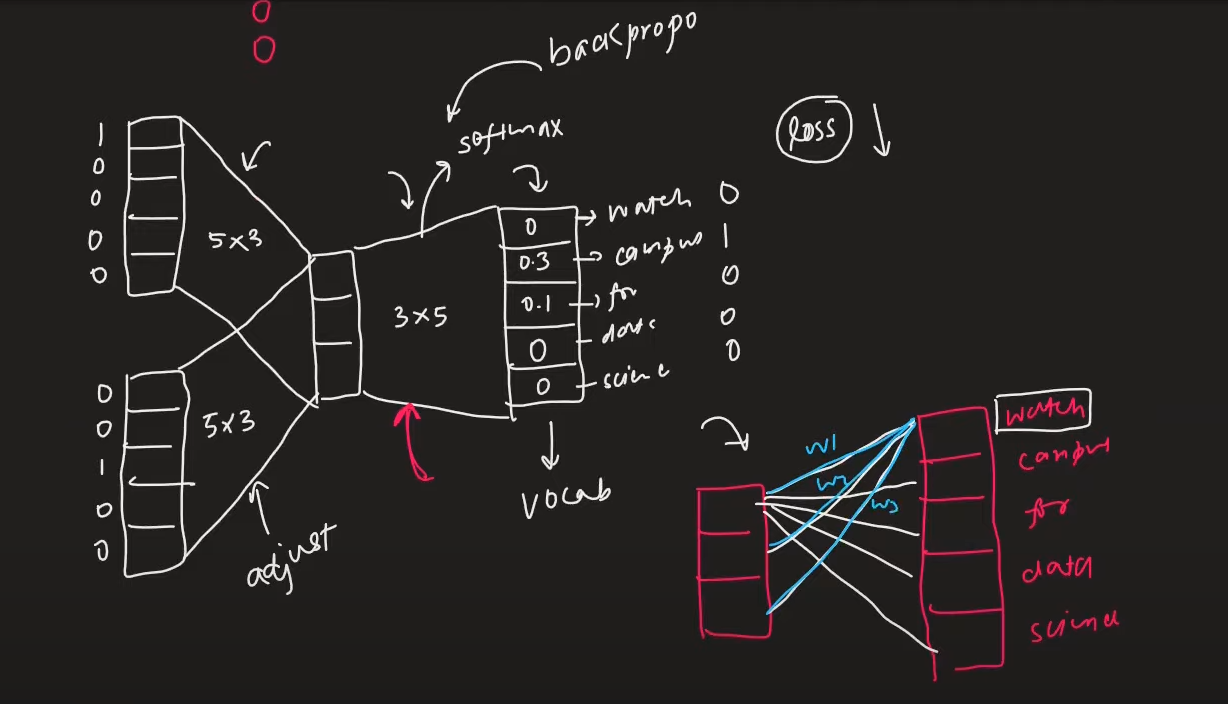
<br>

- Now, the first layer is pointing to watch and for respectively. The OHEs.
- The hidden layer is of size 3 as we decided to have vector of 3D space.
- The softmax function converts scores (logits) into probabilities.
- These random values are corrected using loss function and backpropagation to lower it.
- It should ideally have vector for the target i.e. campusx which would be [0,1,0,0,0]. It is the OHE.
- Finally, we would be having the 3 weights from hidden layer to every word, which will be of size 3X5, which will be ultimately our vector embeddings.

# Skip-gram Words
**This model predicts the surrounding context words given a target word.**

Like we have a sentence: watch campusx for data science<br>
Now, we decide to have a 3D vector for each word in vocabulary. We define a window as well of size 3, where middle word would be called the target word and adjacent ones to be called context words.<br>
| Target/Prediction | Contexts/Input |
|--------|----------|
| campusx | watch,for|
| for     |    campusx,data  |
|data      |   for,science   |
<br>

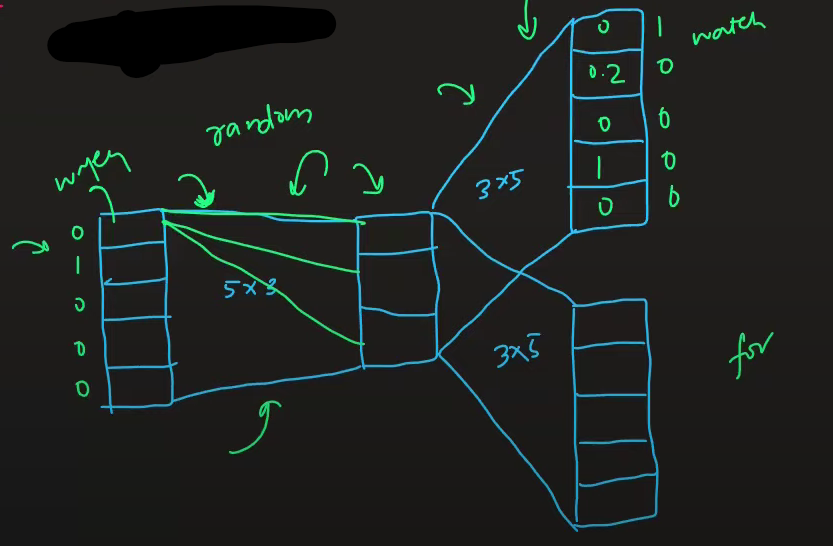
<br>

- Now, the first layer is pointing to campusx. The OHEs.
- The hidden layer is of size 3 as we decided to have vector of 3D space.
- The softmax function converts scores (logits) into probabilities.
- These random values are corrected using loss function and backpropagation to lower it.
- It should ideally have vector for the context i.e. watch and for which would be [1,0,0,0,0] and [0,0,1,0,0]. It is the OHE.
- Finally, we would be having the 3 weights from input layer from every word, which will be of size 5X3, which will be ultimately our vector embeddings.

- For small data prefer CBOW and for larger data, prefer skip-gram.
- Methods for improving Word2Vec:
  - Increase training data
  - Increase dimension of vectors
  - Increase window size

In [14]:
import numpy as np

In [15]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [16]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
filenames = ["001ssb.txt", "002ssb.txt", "003ssb.txt", "004ssb.txt", "005ssb.txt"]

story = []
for filename in filenames:
    with open(filename, "r", encoding='latin-1') as f:
        corpus = f.read()
        raw_sent = sent_tokenize(corpus)
        for sent in raw_sent:
            story.append(simple_preprocess(sent))  # simple_preprocess does some text preprocessing like lowercasing, tokenization etc

In [18]:
len(story)

145020

In [19]:
story

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


- **This initializes a Word2Vec model in Gensim, which learns word embeddings. Params:**

- window: When training, the model looks at a word and considers up to 10 words before and 10 words after it as context.

- min_count: Words that appear fewer than 2 times in your entire dataset are ignored (not included in the vocabulary).

- vector_size: Dimensionality of word embeddings (default=100).

- epochs: Number of passes over the corpus (default=5).

In [20]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2)

In [21]:
model.build_vocab(story)

- total_examples=model.corpus_count: This tells the trainer how many sentences to expect during training.

- epochs=model.epochs: Number of times the model will go over the entire dataset.

- The output returns a tuple: (actual_words, effective_words)<br>
  - actual_words (6569987) → The total number of words (tokens) the training loop actually processed.
  - effective_words (8628190) → The total number of words considered after accounting for factors like subsampling, window, etc.

In [22]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6570635, 8628190)

- **The trained word vectors → stored in .wv (KeyedVectors object).**

In [23]:
model.wv.most_similar('daenerys')

[('stormborn', 0.792938232421875),
 ('targaryen', 0.7700585126876831),
 ('myrcella', 0.7376158833503723),
 ('unburnt', 0.6914162039756775),
 ('viserys', 0.6883304119110107),
 ('queen', 0.6875110864639282),
 ('aegon', 0.6819337010383606),
 ('princess', 0.6703181266784668),
 ('elia', 0.6698181629180908),
 ('rhaegar', 0.6616547703742981)]

In [24]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [25]:
model.wv['king']

array([ 0.5447515 ,  0.7871497 ,  1.6034213 ,  1.7851616 , -2.0459259 ,
       -0.6867221 , -0.62619585,  0.32211465, -2.086084  , -0.81374496,
       -2.4972773 ,  0.63348943,  0.97155774,  1.4331762 , -2.3691294 ,
       -2.4222245 , -0.8685752 ,  3.91655   ,  1.5810938 , -1.0200275 ,
        0.9014711 , -0.9049899 ,  1.3446984 , -2.897071  , -0.3147488 ,
        3.0373087 , -2.2814736 , -1.3776559 ,  0.0177212 ,  1.2148275 ,
       -2.0323467 ,  0.85662216, -0.2977777 , -0.20911399,  1.7133948 ,
       -4.332466  , -3.0419238 , -0.9606277 ,  0.43215585, -2.088479  ,
       -0.7463363 ,  2.6504784 ,  3.3789632 , -0.41334185, -1.59968   ,
       -1.7217942 ,  1.6075048 , -2.0746887 ,  2.5797014 , -1.9999459 ,
       -3.5989656 , -1.5913875 , -2.2416594 , -3.9395235 ,  4.0184703 ,
       -3.0592475 ,  1.0413896 ,  0.751372  ,  0.32286873,  2.025821  ,
        1.1016748 ,  1.5671413 ,  0.29202703,  0.6233549 ,  2.3308294 ,
        1.7820789 , -0.90267575, -1.71152   ,  0.42326936, -1.91

In [26]:
model.wv['king'].shape

(100,)

In [27]:
model.wv.similarity('arya','sansa')

0.8441505

In [28]:
model.wv.vectors.shape #(num_words_in_vocab, vector_size)

(17453, 100)

In [29]:
model.wv.get_normed_vectors() #Returns a NumPy array of all vectors

array([[-0.0139548 , -0.11447686,  0.06055507, ..., -0.05488773,
         0.04198861,  0.11805364],
       [-0.10276957, -0.08696509,  0.20339549, ..., -0.12221806,
        -0.08008713, -0.00949374],
       [ 0.12510012, -0.01594825, -0.10112146, ...,  0.00225894,
         0.11159749, -0.19922213],
       ...,
       [ 0.02406899,  0.0537157 , -0.07466729, ..., -0.01267074,
        -0.02042885, -0.13004465],
       [-0.04245095,  0.08010308,  0.13256943, ...,  0.01761016,
         0.15569834, -0.11740117],
       [-0.03447896,  0.05547971,  0.05564743, ...,  0.04973679,
        -0.00540602, -0.1226538 ]], dtype=float32)

In [30]:
y = model.wv.index_to_key # Tells which vector is of what vocab word

In [31]:
len(y)

17453

In [32]:
y

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'lord',
 'them',
 'no',
 'from',
 'would',
 'were',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'we',
 'could',
 'are',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'king',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'who',
 'down',
 'well',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'father',
 'old',
 'hand',
 'even',
 'too',
 'tyrion',
 'before',
 'never',
 'an',
 'off',
 'see',
 'know',
 'into',
 'made',
 'now',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'then',
 'how',
 'long',
 'has',
 'can',
 'might',
 'us',
 'come',
 'where',
 'here',
 'through',
 'still',
 'face',
 'head',
 'red',
 'll',
 'way',
 'boy',
 'page',
 'must',
 'once',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=3) # Bringing in vectors to 3D shape

In [38]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [39]:
X.shape

(17453, 3)

In [40]:
import plotly.express as px

In [41]:
fig = px.scatter_3d(X[200:800],x=0,y=1,z=2, color=y[200:800])
fig.show()